In [14]:
from variables import user_CIC_dirname
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from project_utils import load_and_etl_CIC_IDS_2017

def times(window_size, timestamps):
    windows = int(len(timestamps)/window_size)
    collected_times = []
    for i in range(windows+1):
        collected_times.append(timestamps[window_size*i])
    results = []
    for i in range(len(collected_times)):
        try:
            results.append(collected_times[i+1] - collected_times[i])
        except IndexError:
            continue
    return results

def print_blocks_dims(sigma_threshs, timestamps, n):
    ress = []
    for (sigma, thresh) in sigma_threshs:
        ris = times(sigma, timestamps)
        if sigma != 0:
            ress.append((sigma, [x for x in ris if x < thresh]))
        else:
            ress.append((sigma, ris))
    if len(ress)==2:
        fig, axs = plt.subplots(1,2, figsize=(10, 5))
    
        for idx, (w, ris) in enumerate(ress):
            col = idx % 2
            ax = axs[col]
            ax.hist(ris, histtype='bar', ec='black')
            ax.set_xlabel("Window's size (sec)",  fontsize=n)
            ax.set_ylabel("# windows",  fontsize=n)
            ax.set_title('\u03C3 = ' + str(w),  fontsize=n)
            ax.tick_params(axis='both', labelsize=n)
            
    if len(ress)==4:
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    
        for idx, (w, ris) in enumerate(ress):
            row = idx // 2
            col = idx % 2
            ax = axs[row, col]
            ax.hist(ris, histtype='bar', ec='black')
            ax.set_xlabel("Window's size (sec)",  fontsize=n)
            ax.set_ylabel("# windows",  fontsize=n)
            ax.set_title('\u03C3 ' + str(w),  fontsize=n)

    plt.tight_layout()
    plt.show()
    fig.savefig('windows.pdf', format='pdf', dpi=300)

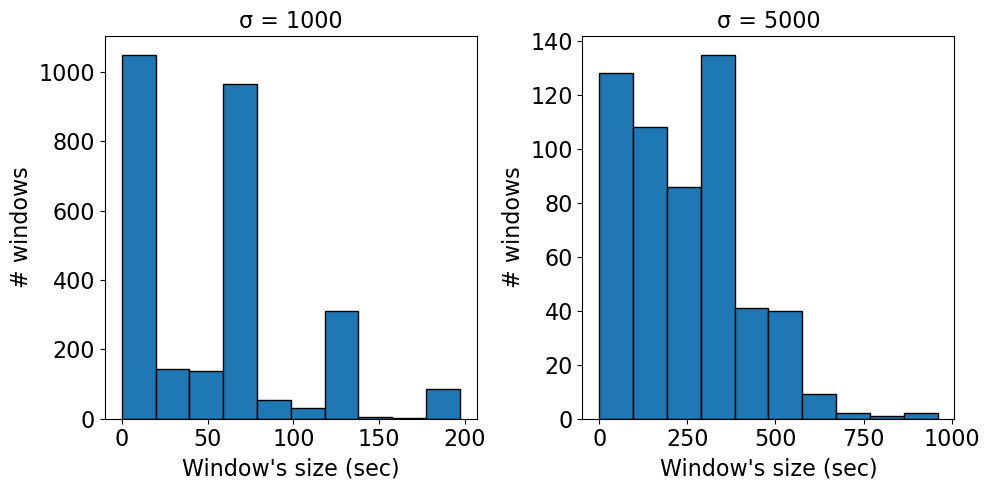

In [17]:
mode=0
window='1000'
days = load_and_etl_CIC_IDS_2017(user_CIC_dirname)
dataset = pd.DataFrame()
for day in days:
    dataset = pd.concat([dataset, day])

timestamps = dataset['Timestamp'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%d-%m %H:%M:%S").timestamp()).to_numpy()

dim_chars=16
sigma_threshs = [(1000, 200), (5000, 1000)]
print_blocks_dims(sigma_threshs, timestamps, dim_chars)